In [3]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.15 in c:\users\ruchita\appdata\local\programs\python\python310\lib\site-packages (from seaborn) (1.21.4)
  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
  Using cached scipy-1.7.3-cp310-cp310-win_amd64.whl (34.3 MB)
  Using cached matplotlib-3.5.1-cp310-cp310-win_amd64.whl (7.2 MB)



ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Ruchita\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\scipy\\sparse\\_sparsetools.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
pip install pandas

  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl (10.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [8]:
application_df = pd.read_csv("C:\\Padhai\\application_record.csv")
application_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
application_df.loc[application_df.DAYS_EMPLOYED==-1194].loc[application_df.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
214,5009032,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
215,6153669,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0


In [10]:
application_df = application_df.drop_duplicates(subset=application_df.columns[1:], keep='first', inplace=False)
application_df.loc[application_df.DAYS_BIRTH== -10554]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
213,5009031,F,N,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-1194,1,0,0,0,Accountants,1.0
359960,6491536,F,Y,Y,0,234000.0,Working,Secondary / secondary special,Married,House / apartment,-10554,-1741,1,0,1,0,Waiters/barmen staff,2.0
363841,6508956,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10554,-534,1,0,0,0,Laborers,1.0
375944,6590652,M,Y,N,0,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10554,-2127,1,0,0,0,Drivers,2.0


In [12]:
credit_status = pd.read_csv("C:\\Padhai\\credit_record.csv")

# replace X, and C by 0
credit_status.STATUS.replace('X', 0, inplace=True)
credit_status.STATUS.replace('C', 0, inplace=True)
credit_status.STATUS = credit_status.STATUS.astype('int')

# record the worst credit record.
credit_record = credit_status.groupby('ID').STATUS.max()
credit_record.head(10)

# combine two table
df = pd.merge(application_df, credit_record, how='inner', on=['ID'])

In [13]:
df.STATUS = df.STATUS.apply(lambda x: 1 if x >= 2 else 0)
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0


In [14]:
df = df.sort_values('AMT_INCOME_TOTAL')
df = df.reset_index(drop=True)
df.ID=df.index
df.columns = ('User_id',
              'Gender',
              'Car',
              'Realty',
              'children_count',
              'income_amount',
              'income_type',
              'education_type',
              'Family_status',
              'Housing_type',
              'Days_birth',
              'Days_employed',
              'Mobile',
              'Work_phone',
              'Phone',
              'Email',
              'Occupation_type',
              'Count_family_members',
              'Reject'
              )

In [15]:
df

,User_id,Gender,Car,Realty,children_count,income_amount,income_type,education_type,Family_status,Housing_type,Days_birth,Days_employed,Mobile,Work_phone,Phone,Email,Occupation_type,Count_family_members,Reject
0,0,F,N,N,0,27000.0,Working,Higher education,Civil marriage,House / apartment,-14869,-5067,1,1,0,0,Managers,2.0,0
1,1,F,N,Y,0,27000.0,Working,Secondary / secondary special,Married,House / apartment,-19128,-1323,1,1,0,0,Security staff,2.0,0
2,2,F,Y,Y,0,29250.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20086,365243,1,0,0,0,NaN,2.0,0
3,3,M,N,Y,0,30150.0,Pensioner,Lower secondary,Married,House / apartment,-23770,365243,1,0,0,0,NaN,2.0,0
4,4,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,365243,1,0,0,0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,9704,M,Y,N,0,1125000.0,Commercial associate,Secondary / secondary special,Married,Rented apartment,-15960,-1646,1,0,0,0,Managers,2.0,0
9705,9705,M,Y,Y,1,1125000.0,Working,Higher education,Married,House / apartment,-16616,-1624,1,0,0,0,Managers,3.0,0
9706,9706,F,Y,Y,2,1125000.0,Commercial associate,Higher education,Married,House / apartment,-14339,-2653,1,1,1,0,Managers,4.0,0
9707,9707,M,Y,N,0,1350000.0,Commercial associate,Higher education,Married,Municipal apartment,-12999,-1560,1,0,1,1,Managers,2.0,0


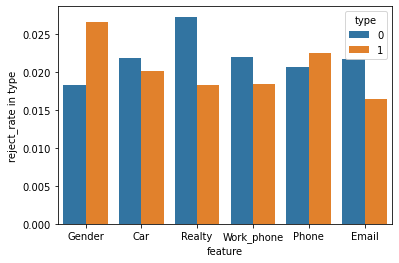

,feature,type,reject_rate in type,count,Reject_count
0,Gender,0,0.018346,6323,116
1,Gender,1,0.026580,3386,90
2,Car,0,0.021828,6139,134
3,Car,1,0.020168,3570,72
4,Realty,0,0.027281,3189,87
5,Realty,1,0.018252,6520,119
6,Work_phone,0,0.021979,7598,167
7,Work_phone,1,0.018475,2111,39
8,Phone,0,0.020677,6916,143
9,Phone,1,0.022556,2793,63


In [16]:
binary_features = ['Gender', 'Car', 'Realty', 'Work_phone', 'Phone', 'Email']
binary_df = df[binary_features+['Reject']].replace('M', 1).replace('F', 0).replace('Y', 1).replace('N', 0)
dict_list = []
for feature in binary_features:
    for one_type in [0, 1]:
        dict_list.append({'feature': feature,
                          'type': one_type,
                          'reject_rate in type': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])/len(binary_df[binary_df[feature]==one_type]),
                          'count': len(binary_df[binary_df[feature]==one_type]),
                          'Reject_count': len(binary_df[binary_df[feature]==one_type][binary_df.Reject==1])
                         })

group_binary = pd.DataFrame.from_dict(dict_list)
sns.barplot(x="feature", y="reject_rate in type", hue="type", data=group_binary)
plt.show()
group_binary

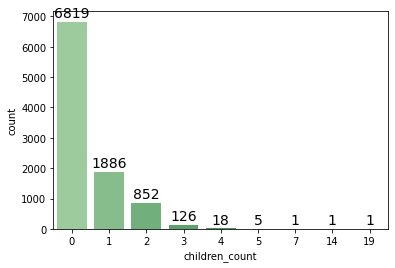

In [17]:
sns.countplot(x="children_count", data=df, palette="Greens_d")
children_count = df.children_count.value_counts()
for a,b in zip(range(len(children_count)), children_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

In [18]:
children_count_4 = [children_count[0], children_count[1], children_count[2], children_count[3:].sum()]
children_count_4_reject = [len(df[df.children_count==0][df.Reject==1]),
                           len(df[df.children_count==1][df.Reject==1]),
                           len(df[df.children_count==2][df.Reject==1]),
                           len(df[df.children_count>=3][df.Reject==1])]

children_count_df = pd.DataFrame.from_dict({'children_count':children_count_4, 'reject_count':children_count_4_reject})
children_count_df['approved_count'] = children_count_df.children_count - children_count_df.reject_count
children_count_df['reject_rate'] = children_count_df.reject_count/children_count_df.children_count
children_count_df

,children_count,reject_count,approved_count,reject_rate
0,6819,138,6681,0.020238
1,1886,42,1844,0.022269
2,852,20,832,0.023474
3,152,6,146,0.039474


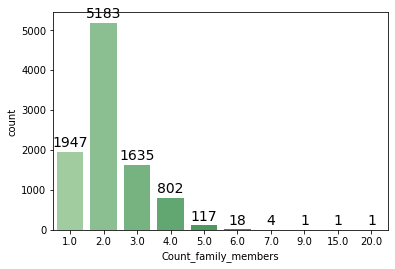

In [19]:
sns.countplot(x="Count_family_members", data=df, palette="Greens_d")
family_members_count = df.Count_family_members.apply(int).value_counts().sort_index()
for a,b in zip(range(len(family_members_count)), family_members_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

In [20]:
family_members_4 = [family_members_count[1], family_members_count[2], family_members_count[3], family_members_count[4:].sum()]
family_members_4_reject = [len(df[df.Count_family_members==1.0][df.Reject==1]),
                           len(df[df.Count_family_members==2.0][df.Reject==1]),
                           len(df[df.Count_family_members==3.0][df.Reject==1]),
                           len(df[df.Count_family_members>=4.0][df.Reject==1])]

family_members_count_df = pd.DataFrame.from_dict({'family_members_count':family_members_4, 'reject_count':family_members_4_reject})
family_members_count_df['approved_count'] = family_members_count_df.family_members_count - family_members_count_df.reject_count
family_members_count_df['reject_rate'] = family_members_count_df.reject_count/family_members_count_df.family_members_count
family_members_count_df

,family_members_count,reject_count,approved_count,reject_rate
0,1947,47,1900,0.024140
1,5183,104,5079,0.020066
2,1635,34,1601,0.020795
3,142,21,121,0.147887


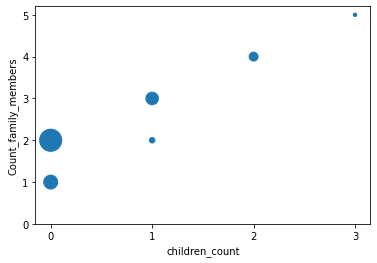

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
gp=df.groupby(by=['children_count','Count_family_members'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:6]
gp_df['times_10'] = gp_df['times'].apply(lambda x: x/10)
ax.scatter(gp_df['children_count'], gp_df['Count_family_members'], s=gp_df['times_10'])
plt.xticks(range(4))
plt.yticks(range(6))
plt.xlabel('children_count')
plt.ylabel('Count_family_members')
plt.show()

In [22]:
gp=df.groupby(by=['children_count','Count_family_members'])
gp_df = gp.size().reset_index(name='times').sort_values('times', ascending=False)[:6]

gp_df

,children_count,Count_family_members,times
1,0,2.0,4880
0,0,1.0,1939
4,1,3.0,1577
7,2,4.0,792
3,1,2.0,303
9,3,5.0,116


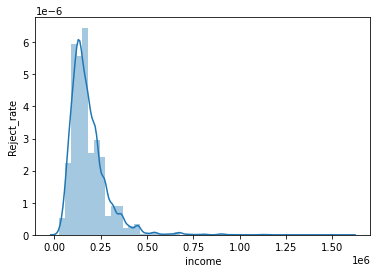

In [23]:
income_plot = pd.Series(df.income_amount, name="income")
plt.ylabel('Reject_rate')
sns.distplot(income_plot)
plt.show()

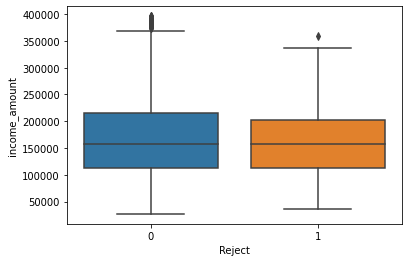

In [24]:
sns.boxplot(x="Reject", y="income_amount", data=df[df.income_amount<=400000])
plt.show()

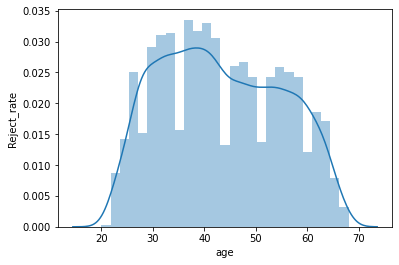

In [25]:
age_series = df.Days_birth.apply(lambda x: int(-x / 365.25))
plt.ylabel('Reject_rate')
age_plot = pd.Series(age_series, name="age")
sns.distplot(age_plot)
plt.show()

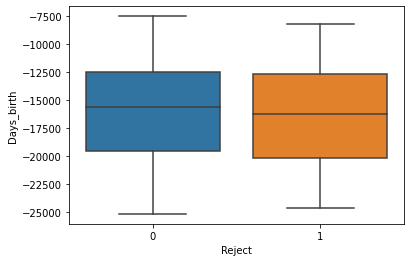

In [26]:
sns.boxplot(x="Reject", y="Days_birth", data=df)
plt.show()

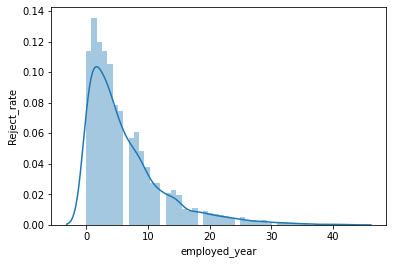

In [27]:
employed_year_series = df[df.Days_employed<0].Days_employed.apply(lambda x: int(-x // 365.25))
plt.ylabel('Reject_rate')
employed_year_plot = pd.Series(employed_year_series, name="employed_year")
sns.distplot(employed_year_plot)
plt.show()

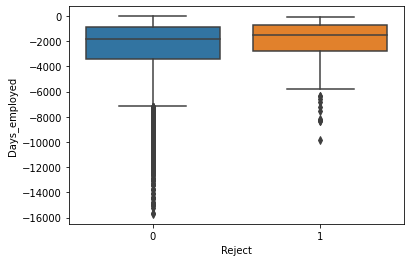

In [28]:
sns.boxplot(x="Reject", y="Days_employed", data=df[df.Days_employed<0])
plt.show()

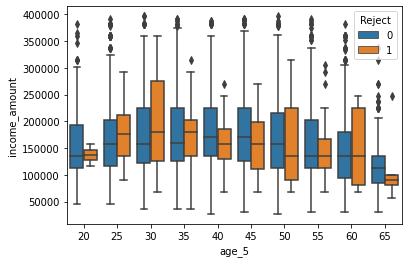

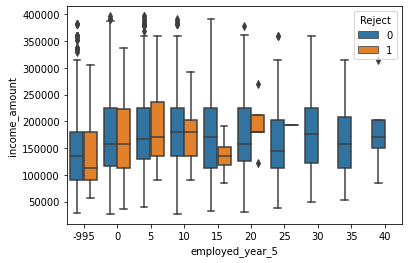

In [29]:
new_df= df
new_df['income_5000'] = df.Days_birth.apply(lambda x: int(-x / 365.25 /5) *5)
new_df['age_5'] = df.Days_birth.apply(lambda x: int(-x / 365.25 /5) *5)
new_df['employed_year_5'] = df.Days_employed.apply(lambda x: int(-x / 365.25 /5) *5)
plot_fig = plt.figure()
aei_plot = sns.boxplot(x="age_5", y="income_amount", hue='Reject', data=df[df.income_amount<=400000])
plt.show()
aei_plot = sns.boxplot(x="employed_year_5", y="income_amount", hue='Reject', data=df[df.income_amount<=400000])
plt.show()

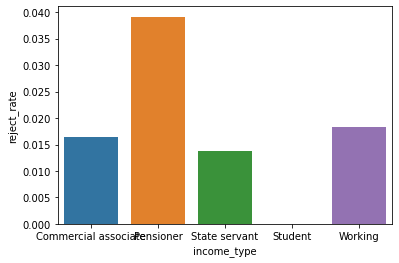

,income_type,times,reject_times,reject_rate
0,Commercial associate,2312,38.0,0.016436
1,Pensioner,1712,67.0,0.039136
2,State servant,722,10.0,0.013850
3,Student,3,0.0,0.000000
4,Working,4960,91.0,0.018347


In [32]:
gp_total=df.groupby(by=['income_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['income_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['income_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="income_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

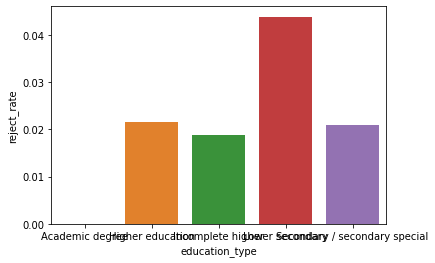

,education_type,times,reject_times,reject_rate
0,Academic degree,6,0.0,0.000000
1,Higher education,2457,53.0,0.021571
2,Incomplete higher,371,7.0,0.018868
3,Lower secondary,114,5.0,0.043860
4,Secondary / secondary special,6761,141.0,0.020855


In [33]:
gp_total=df.groupby(by=['education_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['education_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['education_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="education_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

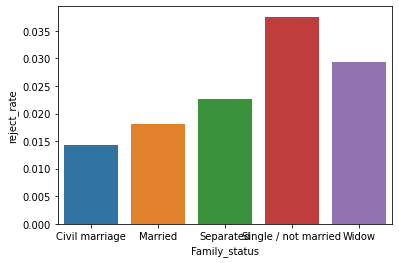

,Family_status,times,reject_times,reject_rate
0,Civil marriage,836,12,0.014354
1,Married,6530,118,0.018070
2,Separated,574,13,0.022648
3,Single / not married,1359,51,0.037528
4,Widow,410,12,0.029268


In [34]:
gp_total=df.groupby(by=['Family_status']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Family_status']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Family_status']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Family_status", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

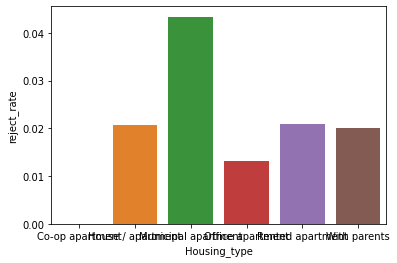

,Housing_type,times,reject_times,reject_rate
0,Co-op apartment,34,0.0,0.000000
1,House / apartment,8684,179.0,0.020613
2,Municipal apartment,323,14.0,0.043344
3,Office apartment,76,1.0,0.013158
4,Rented apartment,144,3.0,0.020833
5,With parents,448,9.0,0.020089


In [35]:
gp_total=df.groupby(by=['Housing_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Housing_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Housing_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Housing_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate

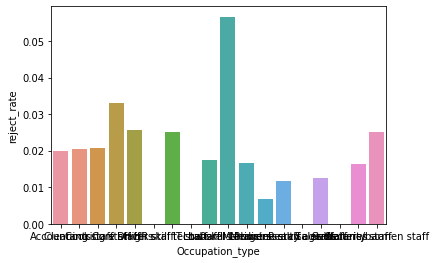

,Occupation_type,times,reject_times,reject_rate
15,Secretaries,46,0.0,0.000000
13,Realty agents,16,0.0,0.000000
5,HR staff,22,0.0,0.000000
7,IT staff,18,0.0,0.000000
11,Medicine staff,291,2.0,0.006873
12,Private service staff,86,1.0,0.011628
14,Sales staff,959,12.0,0.012513
16,Security staff,182,3.0,0.016484
10,Managers,782,13.0,0.016624
8,Laborers,1724,30.0,0.017401


In [36]:
gp_total=df.groupby(by=['Occupation_type']).size().reset_index(name='times')
gp_reject = df[df.Reject==1].groupby(by=['Occupation_type']).size().reset_index(name='reject_times')
gp_reject_rate = pd.merge(gp_total, gp_reject, how='outer', on=['Occupation_type']).fillna(0)
gp_reject_rate['reject_rate'] = gp_reject_rate.reject_times / gp_reject_rate.times
sns.barplot(x="Occupation_type", y="reject_rate", data=gp_reject_rate)
plt.show()
gp_reject_rate.sort_values('reject_rate')